In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_olivetti_faces
from sklearn.model_selection import train_test_split

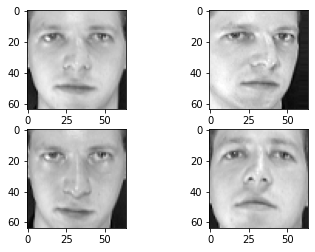

In [2]:
data = fetch_olivetti_faces().images
plt.subplot(2,2,1)
plt.imshow(data[0],cmap='gray')
plt.subplot(2,2,2)
plt.imshow(data[1],cmap='gray')
plt.subplot(2,2,3)
plt.imshow(data[2],cmap='gray')
plt.subplot(2,2,4)
plt.imshow(data[6],cmap='gray')

In [29]:
X = data[:,:,:32]  
y = data[:,:,32:]

In [28]:
def glue(left_half,right_half):
    # merge photos back together
    left_half = left_half.reshape([-1, 64, 32])
    right_half = right_half.reshape([-1, 64, 32])
    return np.concatenate([left_half, right_half], axis=-1)


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X.reshape(X.shape[0],-1), y.reshape(X.shape[0],-1), test_size=0.05, random_state=42)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(380, 2048) (380, 2048)
(20, 2048) (20, 2048)


# Lasso regression  

In [14]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

In [9]:
parameter_dict = {
    'alpha': np.exp(np.linspace(-7,5,10))
}
gscv = GridSearchCV(estimator=Lasso(),param_grid=parameter_dict,scoring='neg_mean_squared_error',cv=5)
gscv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': array([9.11881966e-04, 3.45937734e-03, 1.31237287e-02, 4.97870684e-02,
       1.88875603e-01, 7.16531311e-01, 2.71828183e+00, 1.03122585e+01,
       3.91212840e+01, 1.48413159e+02])},
             scoring='neg_mean_squared_error')

In [10]:
gscv.best_params_

{'alpha': 0.0009118819655545162}

In [22]:
best_alpha = gscv.best_params_
best_alpha

{'alpha': 0.0009118819655545162}

In [25]:
best_alpha = list(best_alpha.values())[0]  

In [ ]:
lass = Lasso(alpha = best_alpha)
lass.fit(X_train,y_train)

err_train_l = mean_squared_error(y_train, lass.predict(X_train))
err_test_l = mean_squared_error(y_test, lass.predict(X_test))


print("Train MSE:", err_train_l)
print("Test MSE:", err_test_l)

pics = glue(X_test, lass.predict(X_test)) # reconstruct and glue together X and predicted Y for the test dataset

plt.figure(figsize=[16, 12])
for i in range(20):
    plt.subplot(4, 5, i + 1)
    plt.imshow(pics[i], cmap='gray')